# Time Series Analysis and Decomposition of Stock Prices with Python

## 1. Importing the libraries

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



## 2. Define Stock-related Parameters 
__Use Case:__ Specifies the stock symbol (e.g., ‘AAPL’ for Apple) and the time range (start and end dates) for which historical stock price data will be downloaded.

In [2]:
stock = 'AAPL'
start = '2023-01-01'
end = '2023-12-31'

## 3. Download Historical Stock Price Data
__Use Case:__ Uses the `yfinance` library to download historical stock price data for the specified stock symbol and time range. The data is stored in a Pandas DataFrame (`df`).

In [3]:
df = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


## 4. Get Familiar with Dataset

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899490,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,172.256681,173.857520,170.981880,172.549000,172.121111,5.921703e+07
std,17.530359,17.261055,17.535099,17.331672,17.504123,1.777392e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,2.404830e+07
25%,161.555000,162.387501,160.699997,162.112499,161.457561,4.781208e+07
50%,175.244995,177.025002,173.840004,175.475006,175.244133,5.507750e+07
75%,186.805000,188.095001,185.174995,187.330002,187.177856,6.574292e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [7]:
df.shape

(250, 6)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.index

DatetimeIndex(['2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

## 5. Visualize Historical Stock Price Data
__Use Case:__ Plots the time series of the closing stock prices over the specified time range using Matplotlib, providing a visual representation of the stock price trends.

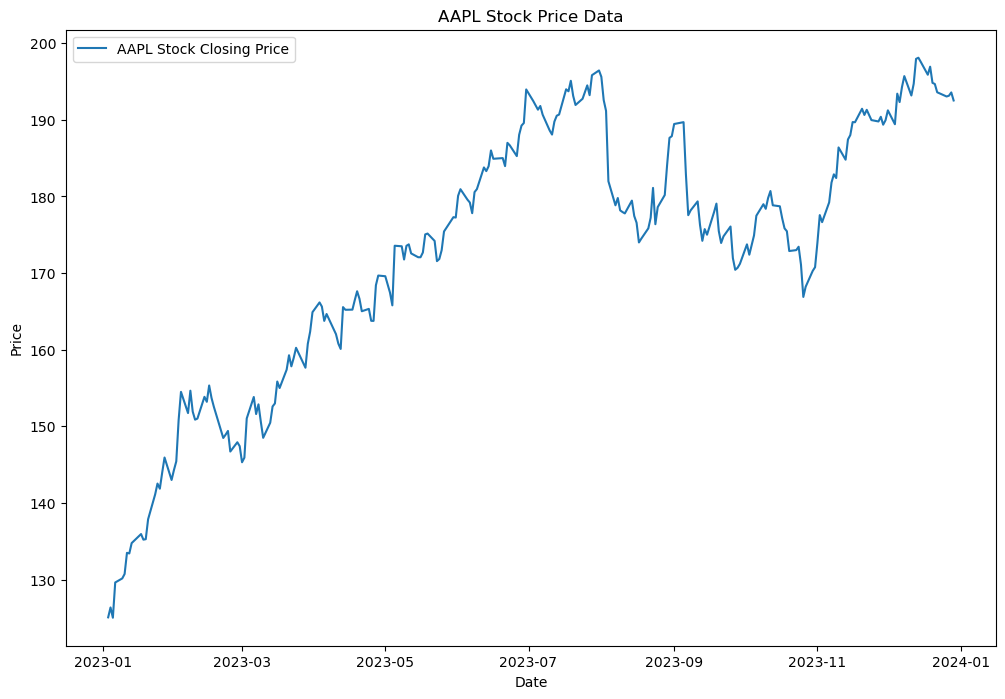

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Close'], label=f'{stock} Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Stock Price Data')
plt.legend()
plt.show()

## 6. Time Series Decomposition of Stock Prices
__Use Case:__ Uses the `seasonal_decompose()` function from the `statsmodels` library to decompose the time series of the closing stock prices into three components: trend, seasonality, and residuals. The resulting components are stored in a `decomposed` variable.

In [11]:
result = seasonal_decompose(df['Close'], model='additive', period=1)

## 7. Visualize Time Series Decomposition
__Use Case:__ Plots the time series of the closing stock prices, the trend component, the seasonal component, and the residual component using Matplotlib, providing a visual representation of the decomposition of the stock price time series.

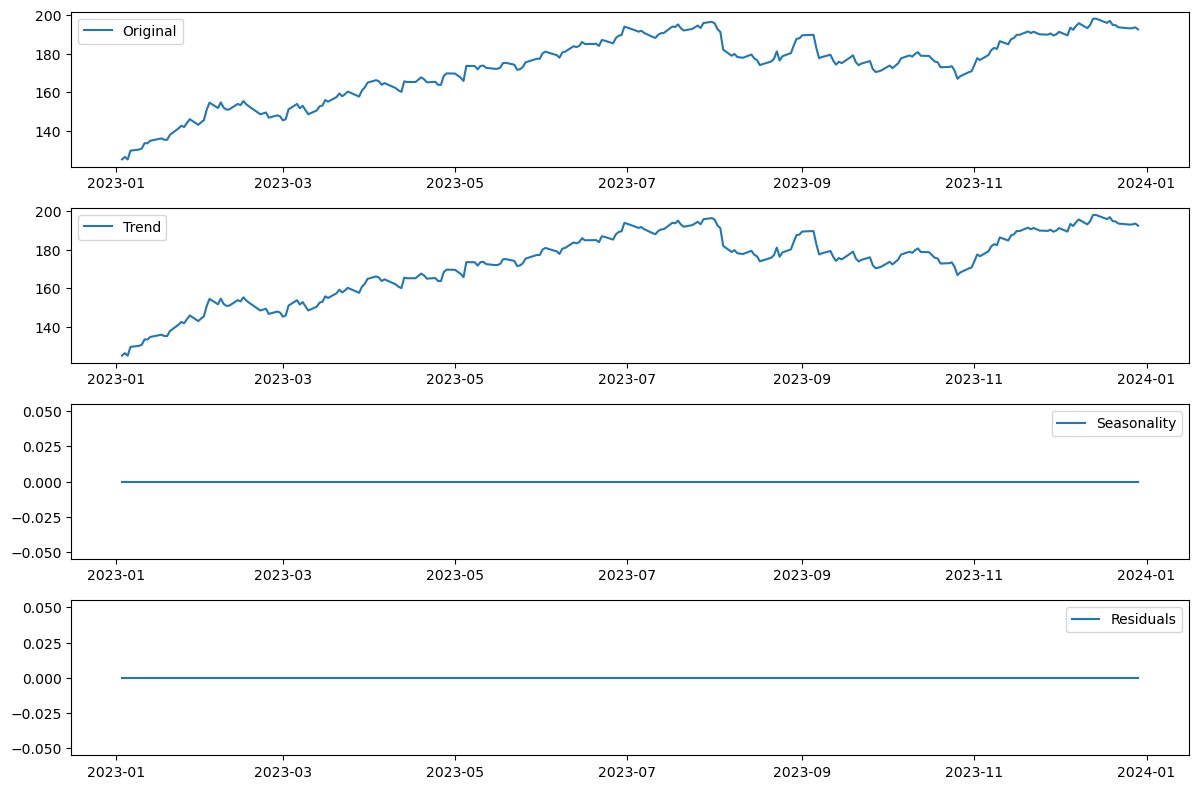

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df.index, df['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
